Intuition
to plot the diameter of the network after an attack of 0.01, 0.02,0.03-0.1 of the nodes at random of all the networks

In [1]:
import networkx as nx
from itertools import combinations
import numpy as np
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #visualisation
from random import sample
import random, math
import LP 
import os
import scipy.io

name = ['dolphins',
 'polbooks',
 'word_adjacencies',
 'arenas-email',
 'Karate',
 'Erdos Renyi',
 'circuits s208_st',
 'circuits s420_st',
 'circuits s838_st',
 'E. Coli',
 'Barabasi_albert_graph',
 'facebook0',
 'facebook107',
 'facebook348',
 'facebook414',
 'facebook686',
 'facebook1684',
 'bn-macaque-rhesus_brain_2',
 'soc-tribes',
 'fb-pages-food',
 'bn-cat-mixed-species_brain_1',
 'soc-firm-hi-tech']

datasets = ["\dolphins\dolphins.gml",
            "\polbooks\out2.txt",
            "\word_adjacencies.gml\word_adjacencies.gml",
            "\\arenas-email\\out2.txt",
            "Karate",
            "Erdos Renyi",
#             "\\USAir97\\USAir97.mtx", 
            "\\circuits\s208_st.txt",
            "\\circuits\s420_st.txt",
            "\\circuits\s838_st.txt",
            "\\E. Coli\E. Coli.txt",
            "Barabasi_albert_graph",
            "\\facebook\\0.edges",
            "\\facebook\\107.edges",
            "\\facebook\\348.edges",
            "\\facebook\\414.edges",
            "\\facebook\\686.edges",
            "\\facebook\\1684.edges",
#             "\\bio-celegans\\bio-celegans.mtx",
            "\\bn-macaque-rhesus_brain_2\\bn-macaque-rhesus_brain_2.txt",
            '\\soc-tribes\\soc-tribes.txt',
            '\\fb-pages-food\\fb-pages-food.txt',
            '\\bn-cat-mixed-species_brain_1\\bn-cat-mixed-species_brain_1.txt',
#             '\\ca-sandi_auths\\ca-sandi_auths.mtx',
            '\\soc-firm-hi-tech\\soc-firm-hi-tech.txt']

def read_graph2(g):
    file_name = 'standard networks dataset' + datasets[int(g)]
    print(file_name)
    G = nx.Graph()
    if g==4:
        G = nx.karate_club_graph()
    elif g==5:
        # nodes = int(input("enter number of nodes?"))
        # edges= int(input("enter number of edges?"))
        G = nx.gnm_random_graph(500, 1500)
    elif g==11:
        # nodes = int(input("enter number of nodes?"))
        # edges= int(input("enter number of edges?"))
        # p = int(input("enter P value?"))
        G = nx.barabasi_albert_graph(500, 3)
    else:
        ext = os.path.splitext(file_name)[1]
        if ext=='.edges':
            G = nx.read_adjlist(file_name, create_using = nx.Graph(), nodetype = int)
        elif ext=='.gml':
            G = nx.read_gml(file_name)
        elif ext=='.mtx':
            G = None
            #matrix = scipy.io.mmread(file_name)
            #G = nx.from_scipy_sparse_matrix(matrix)
        elif ext=='.txt':
            file = open(file_name, 'r')
            lines=  file.readlines()
            G = nx.Graph()
            for line in lines:
                if " " in line:
                    N = line.split(" ")
                else:
                    N = line.split("\t")
                G.add_edge(N[0], N[1])
    if G:
        print(len(G.nodes()), len(G.edges()))
    return G

directory = "Networks/"
networks = []
for filename in os.listdir(directory):
    with open(os.path.join(directory, filename)) as file:
        networks.append(filename)

# read the networks
Datasets = {}
for net in range(len(datasets)):
    Datasets[name[net]] = read_graph2(net)



standard networks dataset\dolphins\dolphins.gml
62 159
standard networks dataset\polbooks\out2.txt
190 441
standard networks dataset\word_adjacencies.gml\word_adjacencies.gml
112 425
standard networks dataset\arenas-email\out2.txt
1893 5451
standard networks datasetKarate
34 78
standard networks datasetErdos Renyi
500 1500
standard networks dataset\circuits\s208_st.txt
122 189
standard networks dataset\circuits\s420_st.txt
252 399
standard networks dataset\circuits\s838_st.txt
512 819
standard networks dataset\E. Coli\E. Coli.txt
1699 3758
standard networks datasetBarabasi_albert_graph
standard networks dataset\facebook\0.edges
500 1491
standard networks dataset\facebook\107.edges
1034 26749
standard networks dataset\facebook\348.edges
224 3192
standard networks dataset\facebook\414.edges
150 1693
standard networks dataset\facebook\686.edges
168 1656
standard networks dataset\facebook\1684.edges
786 14024
standard networks dataset\bn-macaque-rhesus_brain_2\bn-macaque-rhesus_brain_2.txt

In [2]:
len(name)==len(datasets)
print(len(name), len(datasets))
for i in range(22):
    print(name[i], '\t', datasets[i])

22 22
dolphins 	 \dolphins\dolphins.gml
polbooks 	 \polbooks\out2.txt
word_adjacencies 	 \word_adjacencies.gml\word_adjacencies.gml
arenas-email 	 \arenas-email\out2.txt
Karate 	 Karate
Erdos Renyi 	 Erdos Renyi
circuits s208_st 	 \circuits\s208_st.txt
circuits s420_st 	 \circuits\s420_st.txt
circuits s838_st 	 \circuits\s838_st.txt
E. Coli 	 \E. Coli\E. Coli.txt
Barabasi_albert_graph 	 Barabasi_albert_graph
facebook0 	 \facebook\0.edges
facebook107 	 \facebook\107.edges
facebook348 	 \facebook\348.edges
facebook414 	 \facebook\414.edges
facebook686 	 \facebook\686.edges
facebook1684 	 \facebook\1684.edges
bn-macaque-rhesus_brain_2 	 \bn-macaque-rhesus_brain_2\bn-macaque-rhesus_brain_2.txt
soc-tribes 	 \soc-tribes\soc-tribes.txt
fb-pages-food 	 \fb-pages-food\fb-pages-food.txt
bn-cat-mixed-species_brain_1 	 \bn-cat-mixed-species_brain_1\bn-cat-mixed-species_brain_1.txt
soc-firm-hi-tech 	 \soc-firm-hi-tech\soc-firm-hi-tech.txt


In [3]:
Datasets

{'dolphins': <networkx.classes.graph.Graph at 0x206ca6af9a0>,
 'polbooks': <networkx.classes.graph.Graph at 0x206ca818a90>,
 'word_adjacencies': <networkx.classes.graph.Graph at 0x206ca835ee0>,
 'arenas-email': <networkx.classes.graph.Graph at 0x206ca835f70>,
 'Karate': <networkx.classes.graph.Graph at 0x206c6067700>,
 'Erdos Renyi': <networkx.classes.graph.Graph at 0x206ca8353d0>,
 'circuits s208_st': <networkx.classes.graph.Graph at 0x206ca835e20>,
 'circuits s420_st': <networkx.classes.graph.Graph at 0x206ca835cd0>,
 'circuits s838_st': <networkx.classes.graph.Graph at 0x206ca835a90>,
 'E. Coli': <networkx.classes.graph.Graph at 0x206ca835790>,
 'Barabasi_albert_graph': <networkx.classes.graph.Graph at 0x206ca835820>,
 'facebook0': <networkx.classes.graph.Graph at 0x206ca8355e0>,
 'facebook107': <networkx.classes.graph.Graph at 0x206ca818ee0>,
 'facebook348': <networkx.classes.graph.Graph at 0x206ca835a30>,
 'facebook414': <networkx.classes.graph.Graph at 0x206ca835850>,
 'facebook6

In [31]:
# results = {'sim': [i/1000 for i in range(0,100,5)]}
results = pd.read_csv('Data/VandS result.csv').to_dict('list')


In [32]:
for n in Datasets:
    G0 = Datasets[n]
    print(n)
    print('\t\t', len(G0.nodes()), len(G0.edges()))
    if len(G0.nodes())<2000 and n not in results:
        result = []
        if G0:
            Nodes = G0.nodes()
            for t in [i/1000 for i in range(0,100,5)]:
                K = round(len(Nodes)*t)
                sim = []
                for _ in range(1):
                    G = G0.copy()
                    attacked = random.sample(list(Nodes), k=K)
                    #print(f'Nodes = {len(Nodes)}\tK = {K}\tattacked = {len(attacked)}\t t = {t}')
                    edges_to_remove = []
                    for u, v in G.edges():
                        if u in attacked or v in attacked:
                            edges_to_remove.append((u, v))

                    G.remove_edges_from(edges_to_remove)                
                    if G:
                        largest_component = G.subgraph(max(nx.connected_components(G), key=len))
                        sim.append(nx.algorithms.distance_measures.diameter(largest_component))
                result.append(np.mean(sim))
            print('\t\t', result[:5])
            results[n] = result
pd.DataFrame(results).to_csv('Data/VandS result.csv')
print('Simulation done...')

dolphins
		 62 159
polbooks
		 190 441
word_adjacencies
		 112 425
arenas-email
		 1893 5451
		 [13.0, 13.0, 13.0, 13.0, 13.0]
Karate
		 34 78
Erdos Renyi
		 500 1500
circuits s208_st
		 122 189
circuits s420_st
		 252 399
circuits s838_st
		 512 819
E. Coli
		 1699 3758
		 [10.0, 10.0, 10.0, 10.0, 10.0]
Barabasi_albert_graph
		 0 0
facebook0
		 500 1491
facebook107
		 1034 26749
		 [9.0, 9.0, 9.0, 9.0, 9.0]
facebook348
		 224 3192
facebook414
		 150 1693
facebook686
		 168 1656
facebook1684
		 786 14024
bn-macaque-rhesus_brain_2
		 102 628
soc-tribes
		 16 58
fb-pages-food
		 458 457
bn-cat-mixed-species_brain_1
		 130 1139
soc-firm-hi-tech
		 33 91
Simulation done...


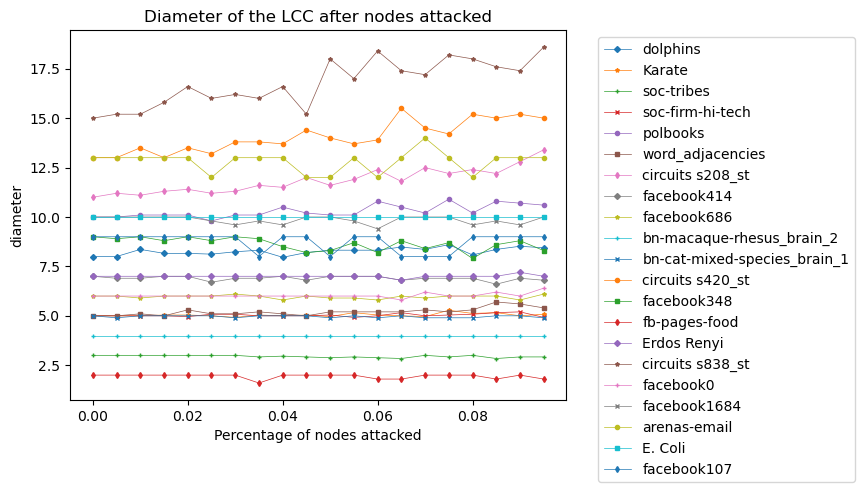

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
markers = ['+', 'x', 'o', 's', 'd', 'D', '*'] # Add your desired markers here

for k, v in results.items():
    if k not in ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'sim']:
        x = [i/1000 for i in range(0,100,5)]
        y = v
        marker_idx = list(results.keys()).index(k) % len(markers) # Choose marker based on index of the result
        ax.plot(x, y, marker=markers[marker_idx], linewidth=0.5, markersize=3, label = k)

ax.set_xlabel('Percentage of nodes attacked')
ax.set_ylabel('diameter')
ax.set_title('Diameter of the LCC after nodes attacked')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
